In [ ]:
"""
LSTM GRU 分类问题Demo
"""

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

import pickle
%matplotlib inline

## 1.导入数据

In [2]:
num_words = 30000
maxlen = 200

In [3]:
with open("../data/rnn_data_x_train.pkl", "rb") as f:
    x_train = pickle.load(f)

In [4]:
with open("../data/rnn_data_x_test.pkl", "rb") as f:
    x_test = pickle.load(f)

In [5]:
with open("../data/rnn_data_y_train.pkl", "rb") as f:
    y_train = pickle.load(f)

In [6]:
with open("../data/rnn_data_y_test.pkl", "rb") as f:
    y_test = pickle.load(f)

In [7]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [8]:
type(x_train[0])

list

In [9]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen, padding='post')
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen, padding='post')

In [10]:
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

(25000, 200)   (25000,)
(25000, 200)   (25000,)


In [11]:
x_train[0]

array([    5,    25,   100,    43,   838,   112,    50,   670, 22665,
           9,    35,   480,   284,     5,   150,     4,   172,   112,
         167, 21631,   336,   385,    39,     4,   172,  4536,  1111,
          17,   546,    38,    13,   447,     4,   192,    50,    16,
           6,   147,  2025,    19,    14,    22,     4,  1920,  4613,
         469,     4,    22,    71,    87,    12,    16,    43,   530,
          38,    76,    15,    13,  1247,     4,    22,    17,   515,
          17,    12,    16,   626,    18, 19193,     5,    62,   386,
          12,     8,   316,     8,   106,     5,     4,  2223,  5244,
          16,   480,    66,  3785,    33,     4,   130,    12,    16,
          38,   619,     5,    25,   124,    51,    36,   135,    48,
          25,  1415,    33,     6,    22,    12,   215,    28,    77,
          52,     5,    14,   407,    16,    82, 10311,     8,     4,
         107,   117,  5952,    15,   256,     4,     2,     7,  3766,
           5,   723,

## 1.LSTM

In [12]:
def lstm_model():
    model = keras.Sequential([
        layers.Embedding(input_dim=30000, output_dim=32, input_length=maxlen), # input_length表示一句话有多少个字
        layers.LSTM(32, return_sequences=True),
        layers.LSTM(1, activation='sigmoid', return_sequences=False)
    ])
    model.compile(optimizer=keras.optimizers.Adam(),
                  loss=keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy']
                 )
    return model
model = lstm_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 32)           960000    
_________________________________________________________________
lstm (LSTM)                  (None, 200, 32)           8320      
_________________________________________________________________
lstm_1 (LSTM)                (None, 1)                 136       
Total params: 968,456
Trainable params: 968,456
Non-trainable params: 0
_________________________________________________________________


In [13]:
%%time
history = model.fit(x_train, y_train, batch_size=64, epochs=5,validation_split=0.1)

Train on 22500 samples, validate on 2500 samples
Epoch 1/5
22500/22500 [==============================] - 63s 3ms/sample - loss: 0.5881 - accuracy: 0.6647 - val_loss: 0.4945 - val_accuracy: 0.8060
Epoch 2/5
22500/22500 [==============================] - 55s 2ms/sample - loss: 0.4092 - accuracy: 0.8466 - val_loss: 0.3986 - val_accuracy: 0.8404
Epoch 3/5
22500/22500 [==============================] - 53s 2ms/sample - loss: 0.4166 - accuracy: 0.8258 - val_loss: 0.5872 - val_accuracy: 0.6712
Epoch 4/5
22500/22500 [==============================] - 62s 3ms/sample - loss: 0.3477 - accuracy: 0.8777 - val_loss: 0.3784 - val_accuracy: 0.8560
Epoch 5/5
22500/22500 [==============================] - 52s 2ms/sample - loss: 0.2523 - accuracy: 0.9204 - val_loss: 0.3972 - val_accuracy: 0.8476
CPU times: user 10min 25s, sys: 2min 44s, total: 13min 10s
Wall time: 4min 44s


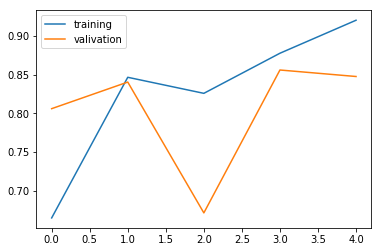

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

## 3.GRU

In [15]:
def lstm_model():
    model = keras.Sequential([
        layers.Embedding(input_dim=30000, output_dim=32, input_length=maxlen),
        layers.GRU(32, return_sequences=True),
        layers.GRU(1, activation='sigmoid', return_sequences=False)
    ])
    model.compile(optimizer=keras.optimizers.Adam(),
                 loss=keras.losses.BinaryCrossentropy(),
                 metrics=['accuracy'])
    return model
model = lstm_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 32)           960000    
_________________________________________________________________
gru (GRU)                    (None, 200, 32)           6336      
_________________________________________________________________
gru_1 (GRU)                  (None, 1)                 105       
Total params: 966,441
Trainable params: 966,441
Non-trainable params: 0
_________________________________________________________________


In [16]:
%%time
history = model.fit(x_train, y_train, batch_size=64, epochs=5,validation_split=0.1)

Train on 22500 samples, validate on 2500 samples
Epoch 1/5
22500/22500 [==============================] - 71s 3ms/sample - loss: 0.6701 - accuracy: 0.5586 - val_loss: 0.6268 - val_accuracy: 0.6096
Epoch 2/5
22500/22500 [==============================] - 61s 3ms/sample - loss: 0.6269 - accuracy: 0.6916 - val_loss: 0.6124 - val_accuracy: 0.6532
Epoch 3/5
22500/22500 [==============================] - 60s 3ms/sample - loss: 0.4635 - accuracy: 0.8039 - val_loss: 0.4755 - val_accuracy: 0.7980
Epoch 4/5
22500/22500 [==============================] - 60s 3ms/sample - loss: 0.5105 - accuracy: 0.7639 - val_loss: 0.4930 - val_accuracy: 0.7732
Epoch 5/5
22500/22500 [==============================] - 62s 3ms/sample - loss: 0.4107 - accuracy: 0.8349 - val_loss: 0.4816 - val_accuracy: 0.7952
CPU times: user 11min 9s, sys: 2min 45s, total: 13min 54s
Wall time: 5min 13s


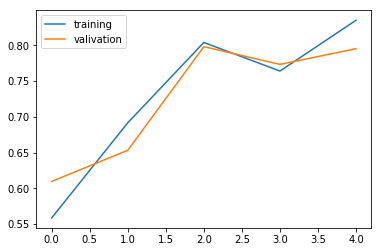

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()